In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [34]:
data = pd.read_csv("/home/mert/Desktop/MLOPS/bitcoin-forecast/data/external/btc_usd_features.csv")

data_valid = data[-90:].copy()
data = data[:-90].copy()
data = data.drop(['date'], axis=1).copy()

y = data['btc_vwap_org'].copy()
X = data.drop(['btc_vwap', "btc_vwap_org"], axis=1)

valid_y = data_valid['btc_vwap_org'].copy()
valid_X = data_valid.drop(['btc_vwap', 'btc_vwap_org', 'date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Lists for the comparison of model results.
rmse = dict
mape = dict

rmse_scores = []
mae_scores = []
mape_scores = []


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

### Linear Regression

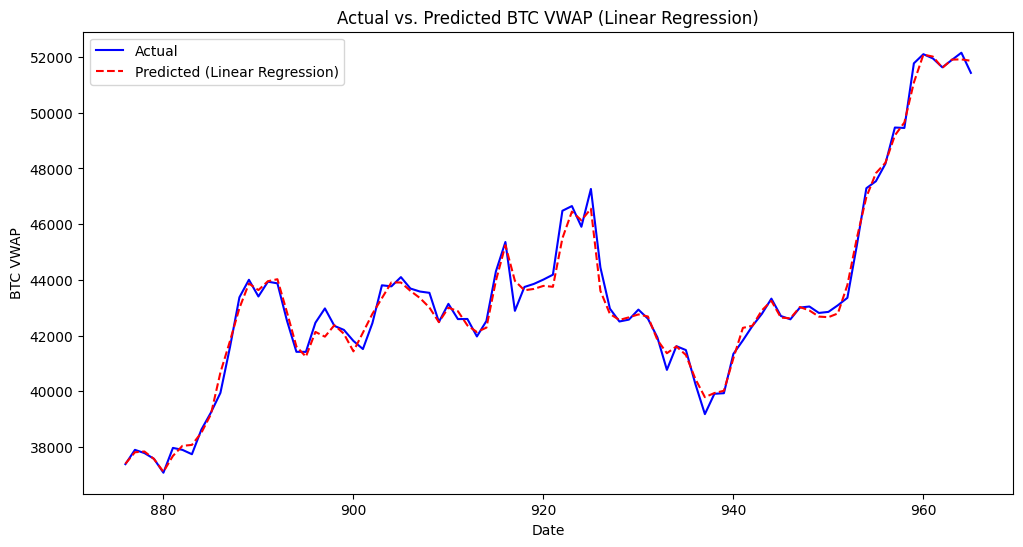

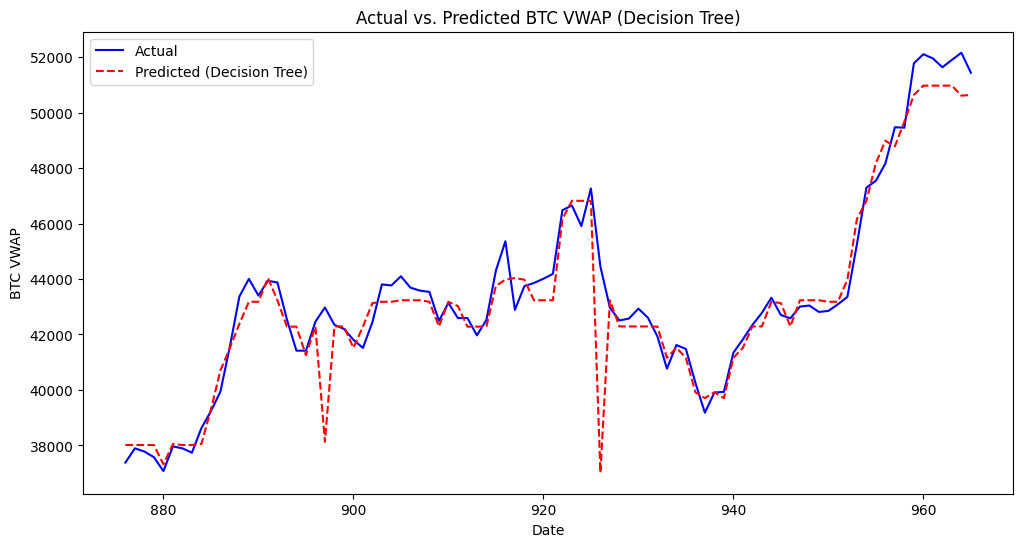

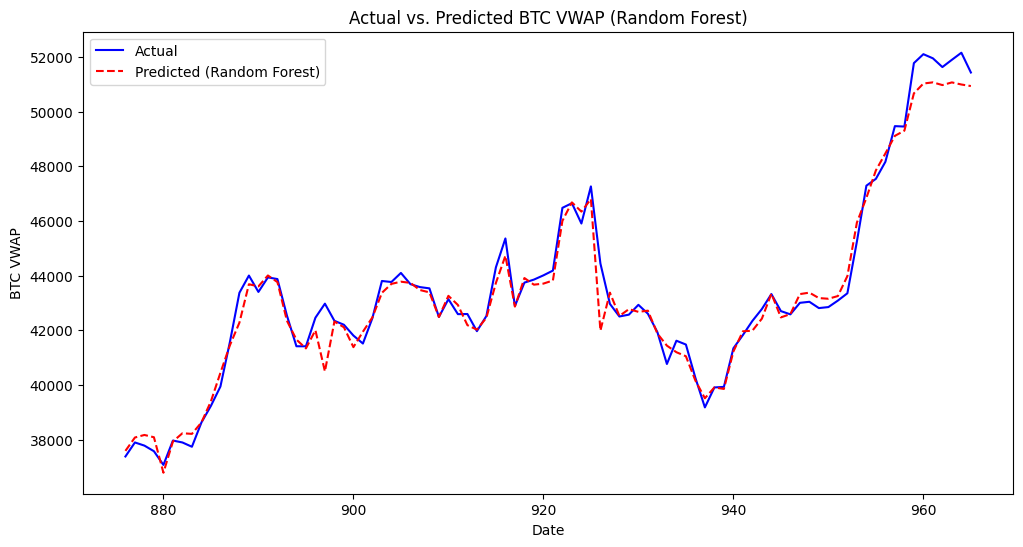

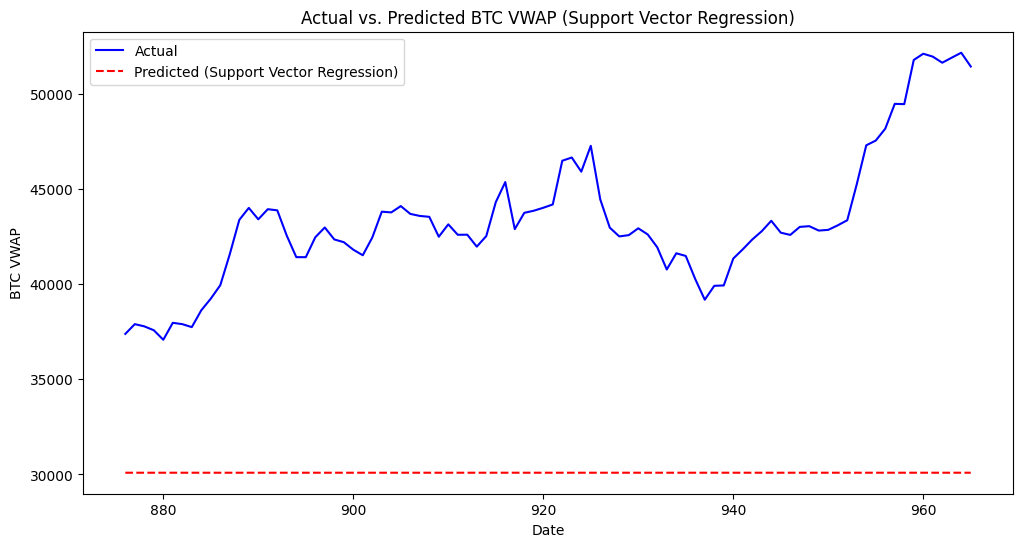

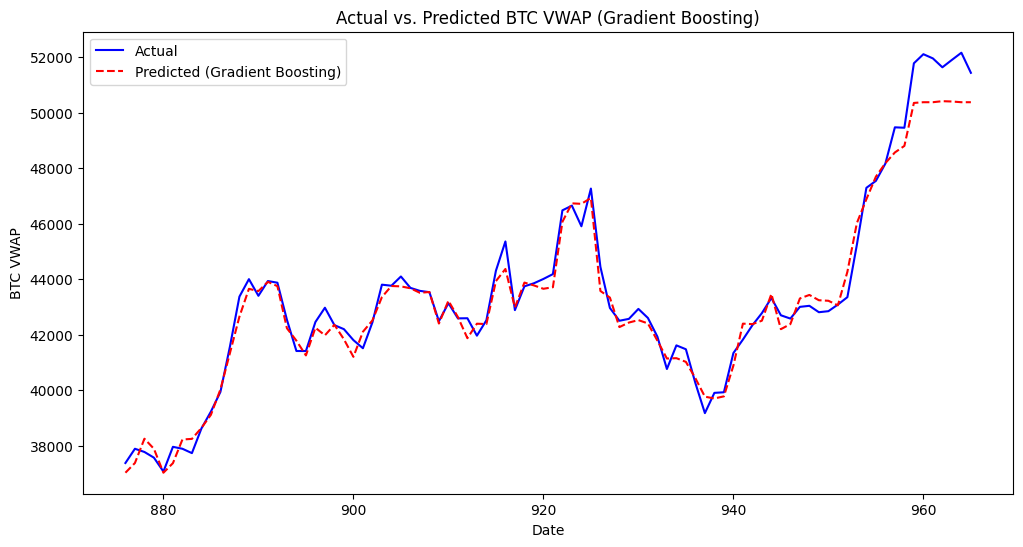

/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


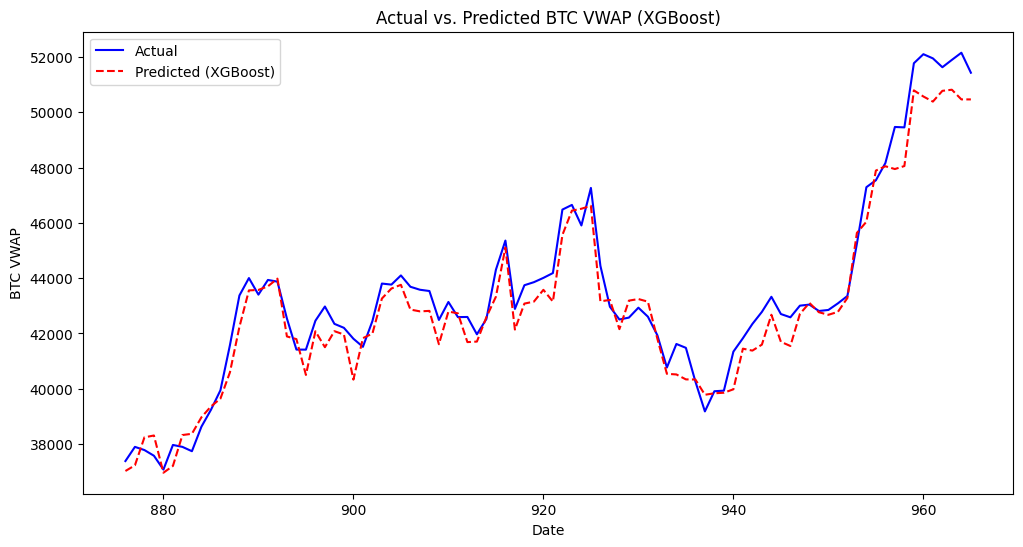

/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


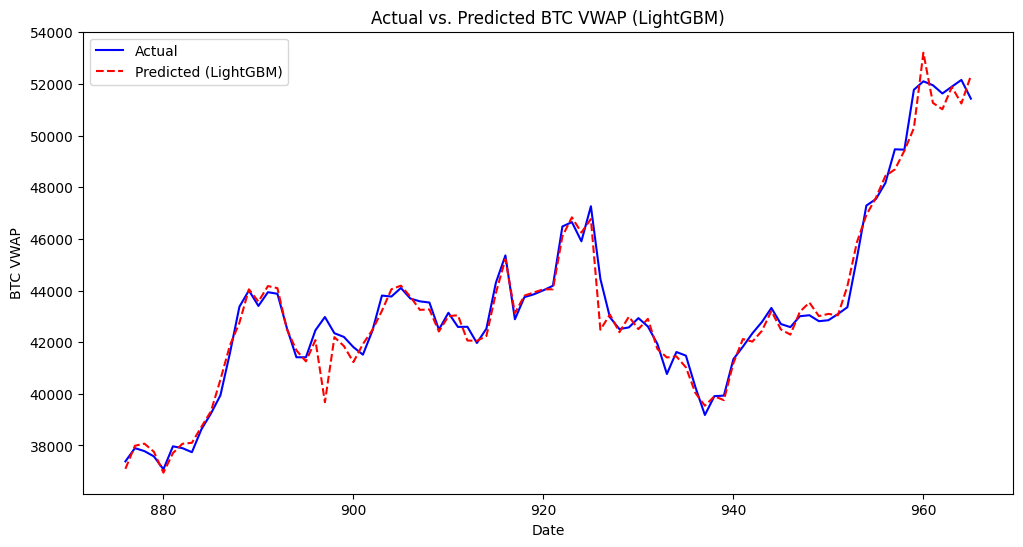

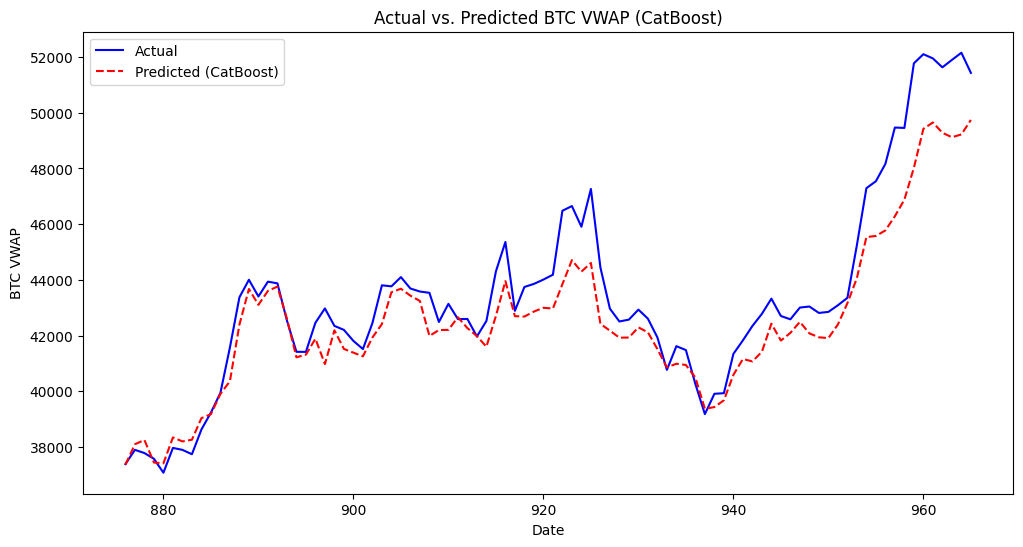

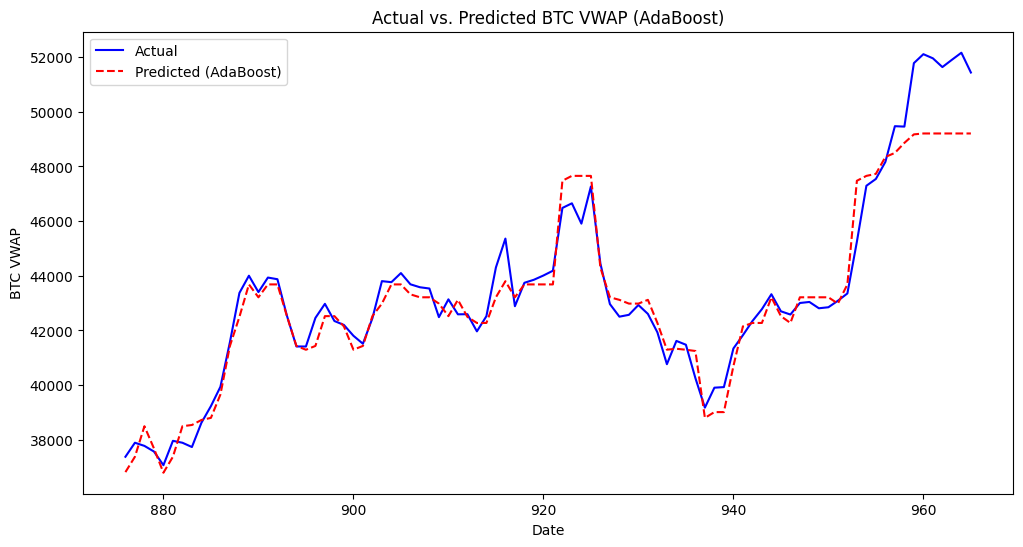

RMSE Scores:
Linear Regression: 338.0700450981946
Decision Tree: 1091.1075708765895
Random Forest: 548.1277408319984
Support Vector Regression: 13713.718878762533
Gradient Boosting: 576.9645272458583
XGBoost: 754.9978867354675
LightGBM: 568.4453079464571
CatBoost: 1267.5661648875
AdaBoost: 934.8339030303405

MAE Scores:
Linear Regression: 244.1980829335159
Decision Tree: 588.9308287921814
Random Forest: 361.7346766470726
Support Vector Regression: 13257.737017468893
Gradient Boosting: 419.89858342254206
XGBoost: 618.8752730378596
LightGBM: 361.8447537917169
CatBoost: 935.6454339784142
AdaBoost: 617.9309012741057


In [36]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

for model_name, model in models.items():
    # XGBoost, LightGBM ve CatBoost modelleri için ayrıca belirli parametreleri kontrol etmek gerekebilir.
    if 'XGBoost' in model_name:
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    elif 'LightGBM' in model_name:
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    elif 'CatBoost' in model_name:
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    else:
        model.fit(X_train, y_train)
    
    # Tahminler yapma
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_valid = model.predict(valid_X)

    # RMSE ve MAE hesaplamaları
    rmse = np.sqrt(mean_squared_error(valid_y, y_pred_valid))
    mae = mean_absolute_error(valid_y, y_pred_valid)

    # Skorları listelere ekleme
    rmse_scores.append((model_name, rmse))
    mae_scores.append((model_name, mae))

    # Tahminlerin gerçek değerlerle karşılaştırılması için grafikleştirme
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
    plt.plot(data.index[-len(valid_y):], y_pred_valid, label=f'Predicted ({model_name})', linestyle='dashed', color='red')
    plt.title(f'Actual vs. Predicted BTC VWAP ({model_name})')
    plt.xlabel('Date')
    plt.ylabel('BTC VWAP')
    plt.legend()
    plt.show()

print("RMSE Scores:")
for model_name, rmse in rmse_scores:
    print(f"{model_name}: {rmse}")

print("\nMAE Scores:")
for model_name, mae in mae_scores:
    print(f"{model_name}: {mae}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


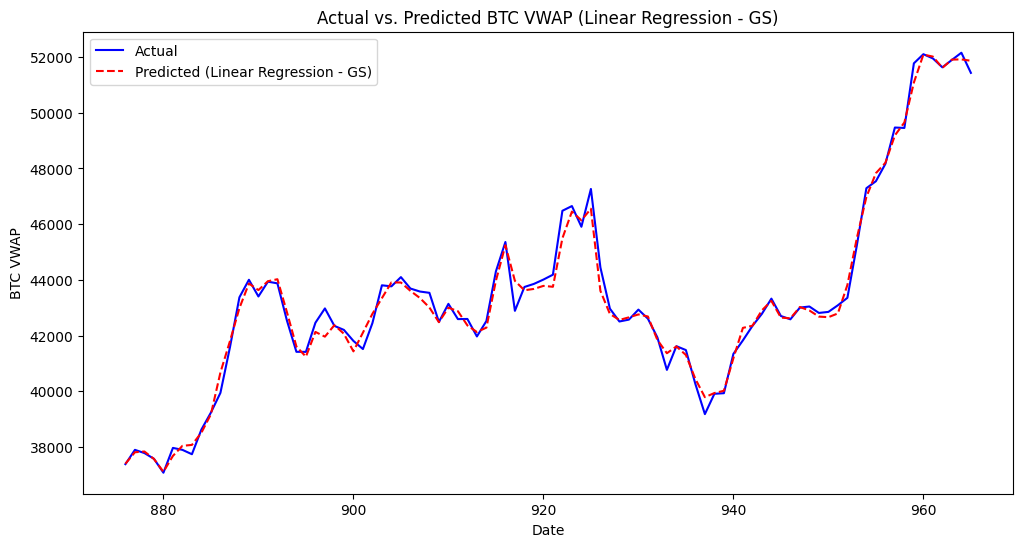

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s[CV] END .....................................max_depth=None; total time=   0.0s

[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................m

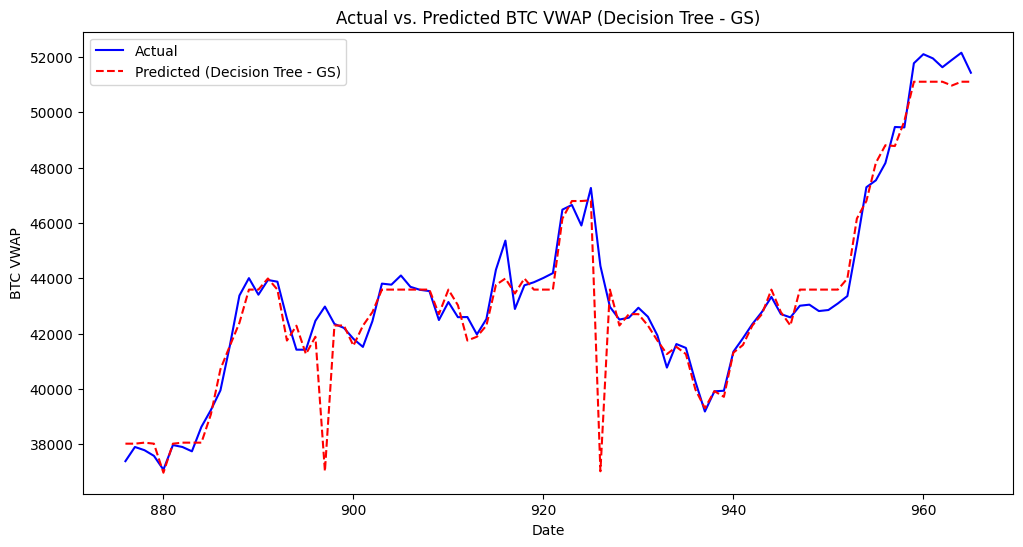

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.5s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.5s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.5s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.6s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.7s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   1.0s
[CV] END ...................max_depth=None, n_es

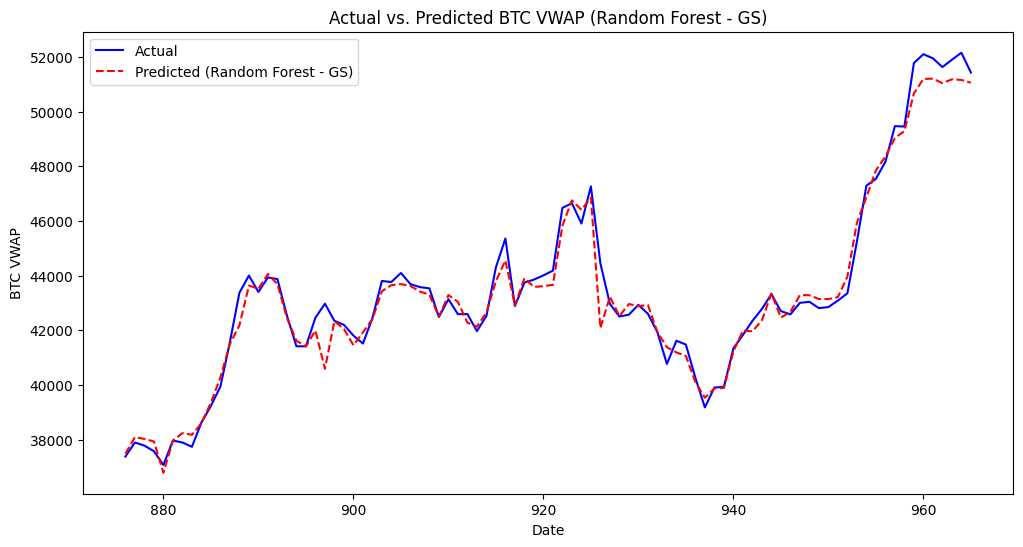

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1

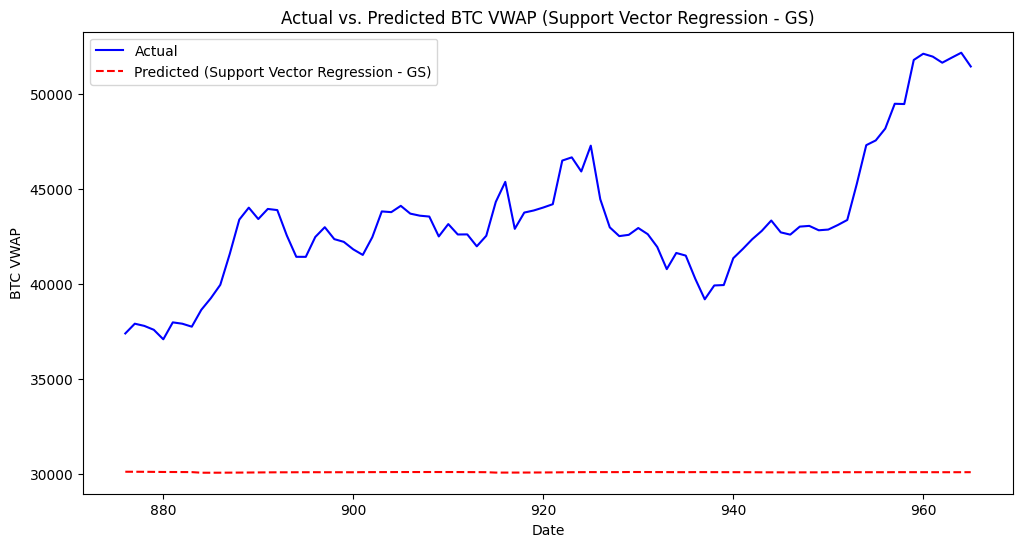

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.5s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.5s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.5s
[CV] END .................learning_rate=0.1, n_es

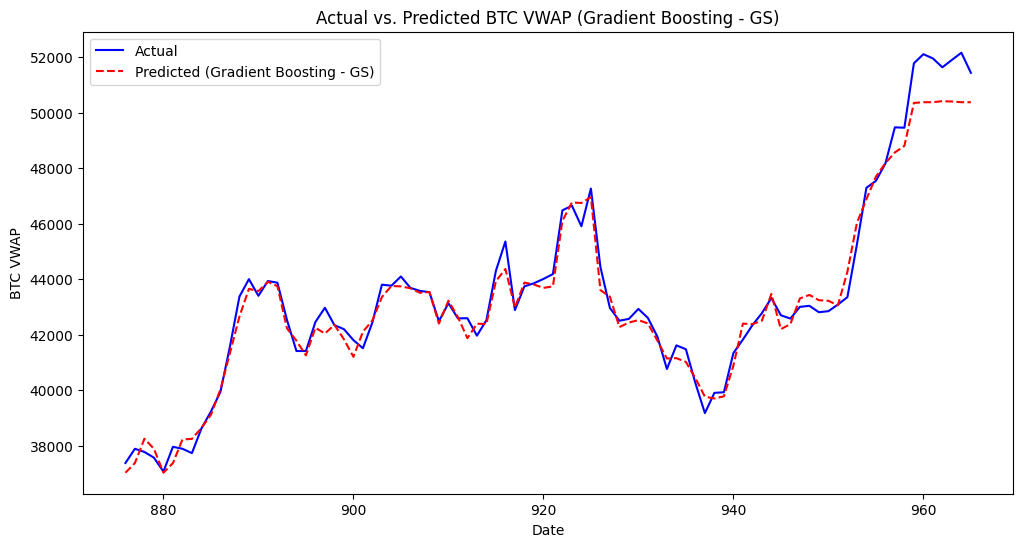

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s


/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_

[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.4s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.4s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.4s


/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_

[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.4s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.5s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s


/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_

[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.8s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.4s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.3s


/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_

[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.5s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.8s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.5s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.4s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.6s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   1.0s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   1.0s
[CV] END ................lea

/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_

[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.6s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.3s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.3s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.3s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.4s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.4s


/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


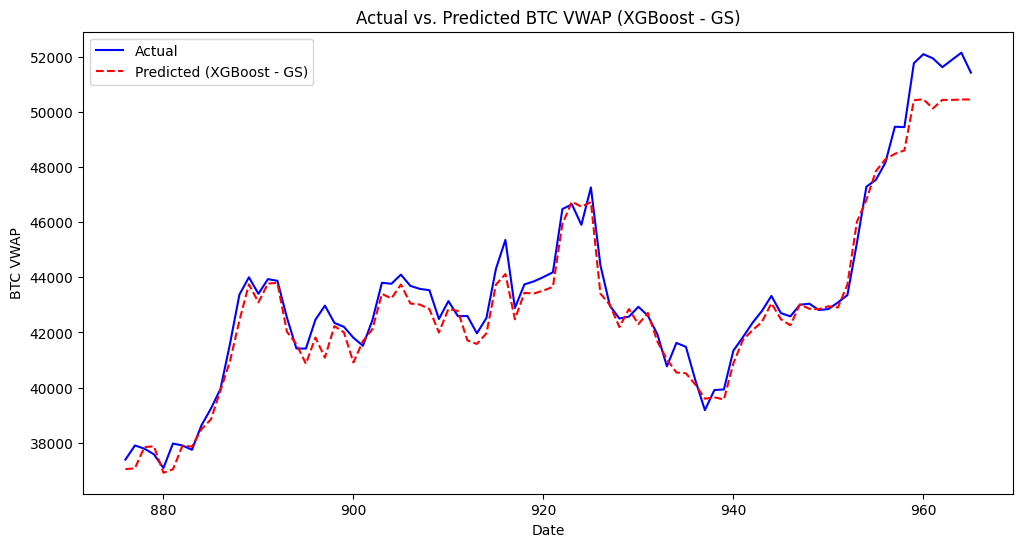

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s

[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s


/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_roun

[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.2s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.1s
[CV] END ...............lear

/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_roun

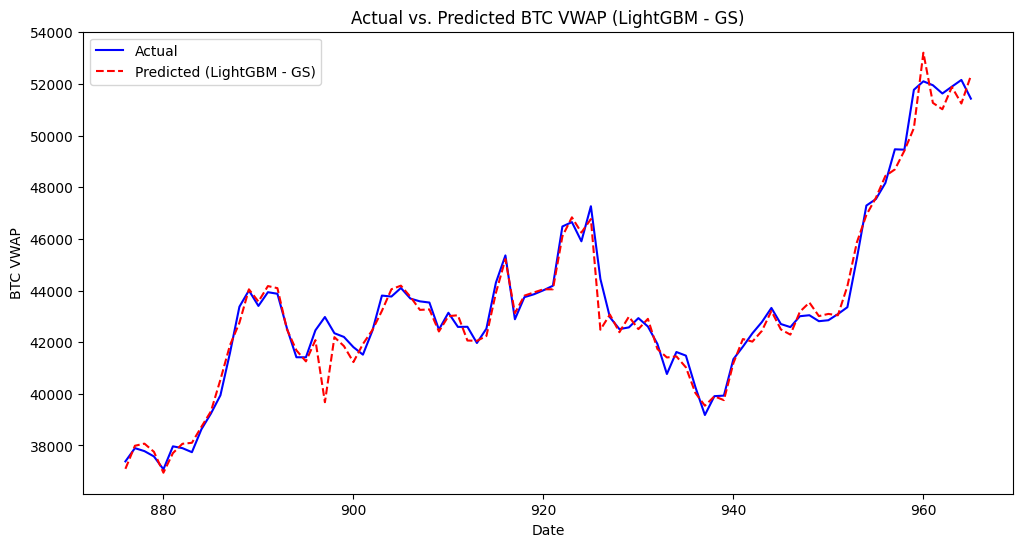

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................iterations=50, learning_rate=0.1; total time=   2.9s
[CV] END ..................iterations=50, learning_rate=0.01; total time=   2.9s
[CV] END ..................iterations=50, learning_rate=0.01; total time=   3.0s
[CV] END ...................iterations=50, learning_rate=0.2; total time=   2.6s
[CV] END ..................iterations=50, learning_rate=0.01; total time=   3.0s
[CV] END ...................iterations=50, learning_rate=0.1; total time=   3.0s
[CV] END ...................iterations=50, learning_rate=0.1; total time=   3.2s
[CV] END ...................iterations=50, learning_rate=0.1; total time=   3.2s
[CV] END ...................iterations=50, learning_rate=0.1; total time=   3.2s
[CV] END ..................iterations=50, learning_rate=0.01; total time=   3.3s
[CV] END ...................iterations=50, learning_rate=0.2; total time=   3.4s
[CV] END ...................iterations=50, learni

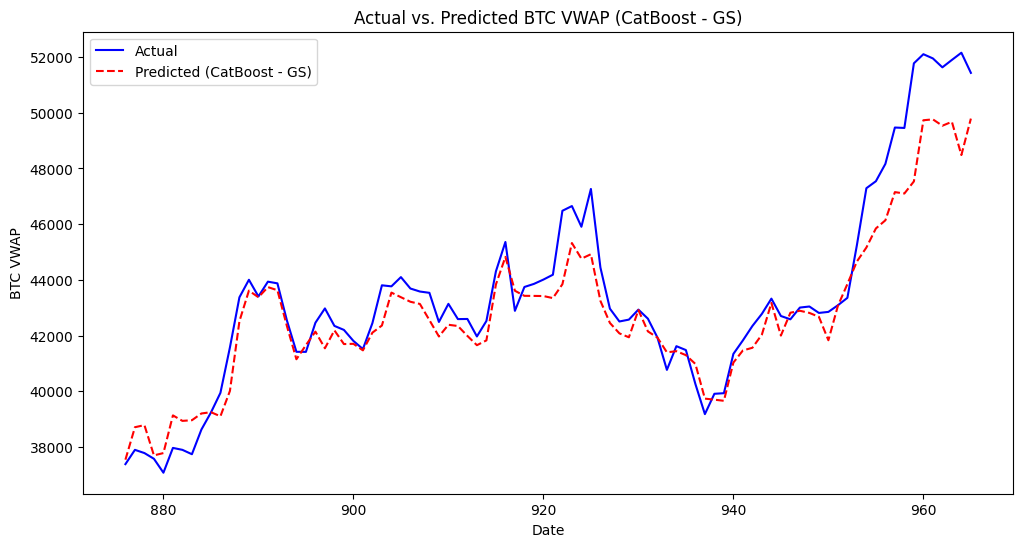

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.5s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.7s
[CV] END ...............learning_rate=0.01, n_est

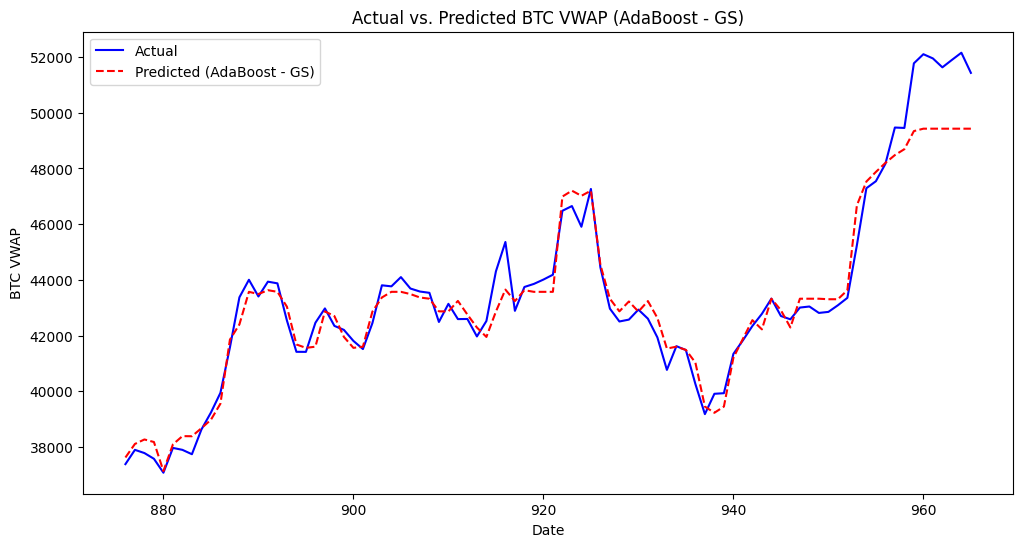

RMSE Scores (Grid Search):
Linear Regression: 338.0700450981946
Decision Tree: 1119.2958711061913
Random Forest: 529.8099705768332
Support Vector Regression: 13723.396607903558
Gradient Boosting: 575.1006393381365
XGBoost: 660.3157182924328
LightGBM: 568.4453079464571
CatBoost: 1160.1215364763377
AdaBoost: 845.3079740517009

MAE Scores (Grid Search):
Linear Regression: 244.1980829335159
Decision Tree: 542.7341289431988
Random Forest: 354.8547249781587
Support Vector Regression: 13267.358275544475
Gradient Boosting: 418.14054682238964
XGBoost: 507.7760250497776
LightGBM: 361.8447537917169
CatBoost: 824.8530827531338
AdaBoost: 563.458997097012
MAPE Scores:
Linear Regression: 1.3598501007514674
Decision Tree: 1.3598501007514674
Random Forest: 1.3598501007514674
Support Vector Regression: 1.3598501007514674
Gradient Boosting: 1.3598501007514674
XGBoost: 1.3598501007514674
LightGBM: 1.3598501007514674
CatBoost: 1.3598501007514674
AdaBoost: 1.3598501007514674


In [37]:
from sklearn.model_selection import GridSearchCV

# Her bir model için optimize edilecek parametreler
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {'max_depth': [None, 5, 10, 15]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 15]},
    'Support Vector Regression': {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Model performanslarını tutacak listeler
rmse_scores_gs = []
mae_scores_gs = []

# Modelleri eğitme ve Grid Search ile performansı değerlendirme
for model_name, model in models.items():
    # İlgili model için parametre gridini al
    param_grid = param_grids[model_name]

    # GridSearchCV kullanarak modeli ve parametre gridini belirtme
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
    
    # XGBoost, LightGBM ve CatBoost modelleri için ayrıca belirli parametreleri kontrol etmek gerekebilir.
    if 'XGBoost' in model_name:
        grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    elif 'LightGBM' in model_name:
        grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    elif 'CatBoost' in model_name:
        grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    else:
        grid_search.fit(X_train, y_train)
    
    # En iyi modeli seçme
    best_model = grid_search.best_estimator_

    # En iyi modelle tahmin yapma
    y_pred_train_gs = best_model.predict(X_train)
    y_pred_test_gs = best_model.predict(X_test)
    y_pred_valid_gs = best_model.predict(valid_X)

    # RMSE ve MAE hesaplamaları
    rmse_gs = np.sqrt(mean_squared_error(valid_y, y_pred_valid_gs))
    mae_gs = mean_absolute_error(valid_y, y_pred_valid_gs)

    mape = np.mean(np.abs((valid_y - y_pred_valid) / valid_y)) * 100

    # Skoru listeye ekleme
    mape_scores.append((model_name, mape))
    # Skorları listelere ekleme
    rmse_scores_gs.append((model_name, rmse_gs))
    mae_scores_gs.append((model_name, mae_gs))

    # Tahminlerin gerçek değerlerle karşılaştırılması için grafikleştirme
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
    plt.plot(data.index[-len(valid_y):], y_pred_valid_gs, label=f'Predicted ({model_name} - GS)', linestyle='dashed', color='red')
    plt.title(f'Actual vs. Predicted BTC VWAP ({model_name} - GS)')
    plt.xlabel('Date')
    plt.ylabel('BTC VWAP')
    plt.legend()
    plt.show()

print("RMSE Scores (Grid Search):")
for model_name, rmse_gs in rmse_scores_gs:
    print(f"{model_name}: {rmse_gs}")

print("\nMAE Scores (Grid Search):")
for model_name, mae_gs in mae_scores_gs:
    print(f"{model_name}: {mae_gs}")

print("MAPE Scores:")
for model_name, mape in mape_scores:
    print(f"{model_name}: {mape}")